# **Data From the Internet**
It is not always practical, nor sometimes feasible for you to collect all the data yourself. For example, how practical is it for you to go around collecting data to study homelessness? You can't really create an online survery, as many homeless may not even have access to reliable internet. Also, what are the chance you can go about and ask each homeless person individualy? You need help, and more often than not, the internet can provide it. 

There are a couple of ways the internet can help with collecting data:


1.   **Online Datasets** - Using already existing data that has been made public and is free to use
2.   **Data Scraping** - Using a script to automatically grab data from a website
3.   **Collaboration** - Reaching out to qualified people to organize the collection of data



# **Online Datasets**
People around the world have already dedicated countless hours to collecting data, and alot of those people have made their research public, allowing for anyone on the internet to use their data. There are many websites dedicated to the accumulation of data such as [kaggle](https://www.kaggle.com/datasets), [Data.gov](https://catalog.data.gov/dataset) , [Datahub.io](https://datahub.io/search)  and many more. So save so yourself some time, and if your project idea allows it, use some of this pre-existing data from the internet!

# **Web Scraping**
Another form of gathering data from the internet is through what is called "Web Scraping", which is a method of automatically grabing infromation from a website. It is particularly useful in grabbing text but it can modified to grab data from just about any part of the website. One downside is that certain organizations have measures in place to prevent large scale data scraping of their pages, either because they have a reasonable concern with protecting their data, or simply because their web servers cannot handle the increase of network traffic created by these web scraping scripts.

# **Imports**
IF we plan to access data from a website, then it is safe to assume we are going to need a couple of libraries to help us read a website, store that info, and then modify it to our liking

In [ ]:
# Allows us to read in a website via URL
from urllib.request import urlopen 


# Allows us to create an HTML parser
# - Allowing us to focus on just the part of the website that we care about
from bs4 import BeautifulSoup     

# Allow us to use regular expressions to help clean up our data
import re

# **Opening Our Webpage**


In [ ]:
url = "https://www.latimes.com/homeless-housing/story/2021-12-15/housing-groups-want-to-raise-tax-to-address-homelessness"
# url = "http://olympus.realpython.org/profiles/dionysus" # variable that stores the site's url
page = urlopen(url) # is going to wrap the website inside the variable page
html = page.read().decode("utf-8") # takes in the site wraper (page) and stores it's code

print(html[0:400]) # prints the html code for the site



<!DOCTYPE html>
<html class="page article-page" lang="en-US">
    
    <head>
    <meta charset="UTF-8">

    <style data-cssvarsponyfill="true">
        :root {
        --site-bg-color: #ffffff;
        --site-inverse-bg-color: #000000;

        --header-bg-color: #ffffff;
        --header-bg-color-inverse: #000000;
        --header-border-color: #e6e6e6;
        --header-border-color-inverse: #8


In [ ]:
# takes in the html code and gives us the ability to parse through the html
parse = BeautifulSoup(html, "html.parser") 

# **HTML?**
HTML is not a typical programing language, in fact it simply is not. HTML is actually a markup language which means it is used to provide structure to websites, and that is about it, it has no functions, no variables, no loops, and no conditionals, meaning it needs the help of other languages such as python and javascript to really make the website stand out.

# Elements
HTML elements are the building blocks that provide structure to the whole page.
Almost all elements have a opening `<head ...>` and a closing `<\head>`, which encompass everything in between. On top of that opening, elements can have attributes which can help distinquish same elements from one another, for example:

`<div class="first_div">...<\div>` vs
`<div class="second_div">...<\div>`

And we can use this to our advantage by identify the element that encompases our desired information, rather than using the entire document...

# **Lets Clean-up our data**
Notice all those html elements, and styles. Wouldn't it be nice if we got rid of those?

In [ ]:
print(parse.get_text()) # gets rid of all html markers, but does not focus on the article






        :root {
        --site-bg-color: #ffffff;
        --site-inverse-bg-color: #000000;

        --header-bg-color: #ffffff;
        --header-bg-color-inverse: #000000;
        --header-border-color: #e6e6e6;
        --header-border-color-inverse: #858585;
        --header-text-color: #333333;
        --header-text-color-inverse: #ffffff;
        --header-menu-bg-color: #ffffff;
        --header-menu-text-color: #333333;

        --secondary-header-bg-color: #ffffff;
        --secondary-header-text-color: #333333;

        --section-header-bg-color: #ffffff;
        --section-header-border-color: #e6e6e6;
        --section-header-text-color: #333333;
        --section-nav-text-color: #333333;
        --section-nav-drop-down-color: #333333;
        --section-nav-current-indicator-color: #ff6859;

        --footer-bg-color: #000000;
        --footer-text-color: #ffffff;

        --primary-text-color: #000000;
        --primary-text-color-inverse: #ffffff;
        --secondary-tex

# **CTRL + I**
Ctrl + I allows us to inspect the source code of any website (may be blocked on certain school devices), using that we can identify that this LA Times newspaper article is within a div with the class called "rich-text-article-body-content rich-text-body"

In [ ]:
article = str(parse.find_all("div",  class_="rich-text-article-body-content rich-text-body"))

print(article)

[<div class="rich-text-article-body-content rich-text-body" data-subscriber-content=""><p>In an ambitious effort to address the homelessness crisis in Los Angeles, a coalition of housing advocates, labor unions and progressive activist groups plans to file paperwork  Thursday for a ballot measure that would increase taxes on real estate transactions in the city to fund permanent housing for homeless people and those at risk of ending up on the street.</p><p>The organizers hope to collect nearly 65,000 signatures by spring to place the tax proposal on the November 2022 ballot.</p><p>The measure would levy a 4% tax on property sales above $5 million  that would rise to 5.5% on transactions above $10 million. The buyer or seller would owe $200,000 on a $5-million sale, for example. </p><p>“This is really about millionaires and billionaires paying their fair share to have a transformative approach to solving our housing crisis,” said Laura Raymond, director of the Alliance for Community Tr

Notice that the article is still there, but now we have to get rid of all the unwated characters, as well as html elements, this is where regular expressions come in

In [ ]:
article = re.sub("<.*?>", "", article) # removes everthing that is within < >
article = re.sub("Advertisement", "", article) # removes the word advertisement
article = re.sub('[^A-Za-z0-9\s]+', '', article) # keeps anything that is not a special character

print(article)

In an ambitious effort to address the homelessness crisis in Los Angeles a coalition of housing advocates labor unions and progressive activist groups plans to file paperwork  Thursday for a ballot measure that would increase taxes on real estate transactions in the city to fund permanent housing for homeless people and those at risk of ending up on the streetThe organizers hope to collect nearly 65000 signatures by spring to place the tax proposal on the November 2022 ballotThe measure would levy a 4 tax on property sales above 5 million  that would rise to 55 on transactions above 10 million The buyer or seller would owe 200000 on a 5million sale for example This is really about millionaires and billionaires paying their fair share to have a transformative approach to solving our housing crisis said Laura Raymond director of the Alliance for Community TransitLos Angeles or ACTLA and a leader of the ballot measure coalition






This affects folks who are very privileged who have mad

# **We now have just the article that we wanted!**
We can now use this data to do whatever we want with the article!

## Word Clouds!

(-0.5, 399.5, 199.5, -0.5)

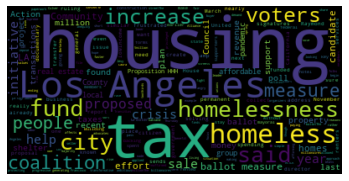

In [ ]:
# Libraries
!pip install wordcloud

# Imports
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

# We already have our article!
wordcloud = WordCloud(stopwords=STOPWORDS).generate(article)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# **Graphs!**

['In', 'an', 'ambitious', 'effort', 'to', 'address', 'the', 'homelessness', 'crisis', 'in', 'Los', 'Angeles', 'a', 'coalition', 'of', 'housing', 'advocates', 'labor', 'unions', 'and', 'progressive', 'activist', 'groups', 'plans', 'to', 'file', 'paperwork', '', 'Thursday', 'for', 'a', 'ballot', 'measure', 'that', 'would', 'increase', 'taxes', 'on', 'real', 'estate', 'transactions', 'in', 'the', 'city', 'to', 'fund', 'permanent', 'housing', 'for', 'homeless', 'people', 'and', 'those', 'at', 'risk', 'of', 'ending', 'up', 'on', 'the', 'streetThe', 'organizers', 'hope', 'to', 'collect', 'nearly', '65000', 'signatures', 'by', 'spring', 'to', 'place', 'the', 'tax', 'proposal', 'on', 'the', 'November', '2022', 'ballotThe', 'measure', 'would', 'levy', 'a', '4', 'tax', 'on', 'property', 'sales', 'above', '5', 'million', '', 'that', 'would', 'rise', 'to', '55', 'on', 'transactions', 'above', '10', 'million', 'The', 'buyer', 'or', 'seller', 'would', 'owe', '200000', 'on', 'a', '5million', 'sale', 

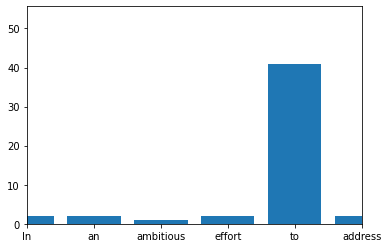

In [ ]:
# Imports
import matplotlib.pyplot as plt
from collections import Counter

# Our Code Using Article
words = article.split(" ") # simple space-based tokenizer
# print(words)
count = Counter(words)

plt.xlim([0, 5])
plt.bar(count.keys(), count.values())
plt.show()

# **Collaboration**
The final mainstream way of using the internet to collect data is through collaboration. The internet can be a great place to share survery, host polls, ask questions, etc. But on top of it all it is a great place to connect with professionals and experts to formulate teams determined to collect the best and most accurate data possible.